In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_dir = Path(".").absolute().parent / "data"
fig_dir = Path(".").absolute().parent / "figs"
fig_dir.mkdir(exist_ok=True)

In [3]:
df = (
    pd.read_csv(data_dir / "tidy.csv", parse_dates=["dt"])
    .assign(time_sinse_start=lambda x: pd.to_timedelta(x.time_sinse_start))
)

In [4]:
df.groupby("group").apply(lambda x: pd.Series({
    "Time of First Data Entry": np.min(x["dt"]),
    "Time of Last Data Entry": np.max(x["dt"]),
    "Total Period": pd.to_datetime(x["dt"].max()) - (pd.to_datetime(x["dt"].min()))
}))

,Time of First Data Entry,Time of Last Data Entry,Total Period
group,,,
A,2018-08-07 09:00:00,2018-08-22 05:00:00,14 days 20:00:00
B,2018-09-19 10:00:00,2018-10-06 07:00:00,16 days 21:00:00
C,2018-10-11 10:00:00,2018-10-24 07:00:00,12 days 21:00:00
D,2018-05-30 10:00:00,2018-06-12 07:00:00,12 days 21:00:00


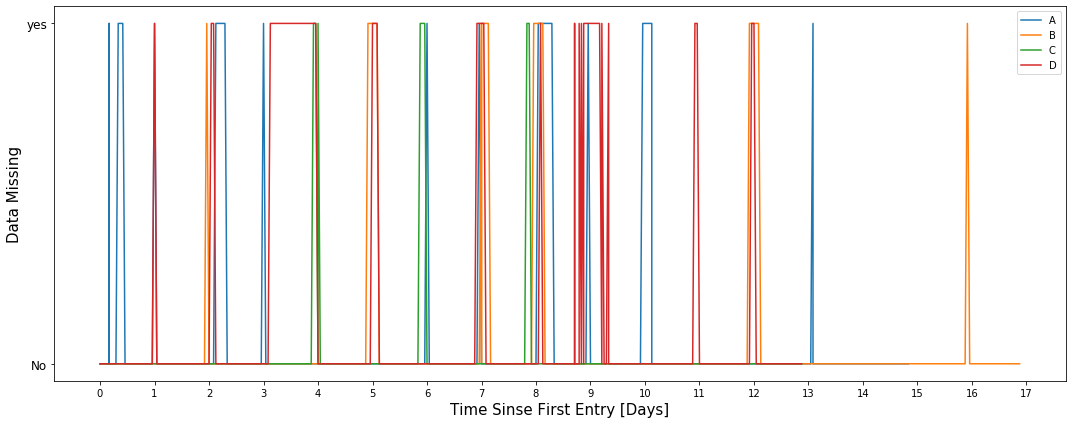

In [162]:
dfp = (
    df
    .assign(is_missing=lambda x: x.drink.isna().map({False:0, True:1}),
           time_sinse_start= lambda x: x.time_sinse_start.astype('timedelta64[h]') / 24)
)

fig, ax = plt.subplots(figsize=(15,6))
for label, df1 in dfp.groupby('group'):
    print()
    ax.plot(df1["time_sinse_start"], df1["is_missing"], label=label)


ax.set_yticks([0, 1])
ax.set_yticklabels(["No", "yes"], fontsize=12)
ax.set_ylabel("Data Missing", fontsize=15)

ax.set_xticks(list(range(18)))
ax.set_xticklabels(list(range(18)))
ax.set_xlabel("Time Sinse First Entry [Days]", fontsize=15)

ax.legend()
plt.tight_layout()
plt.savefig(str(fig_dir / "MissingData_AllGroups.png"), dpi=300)

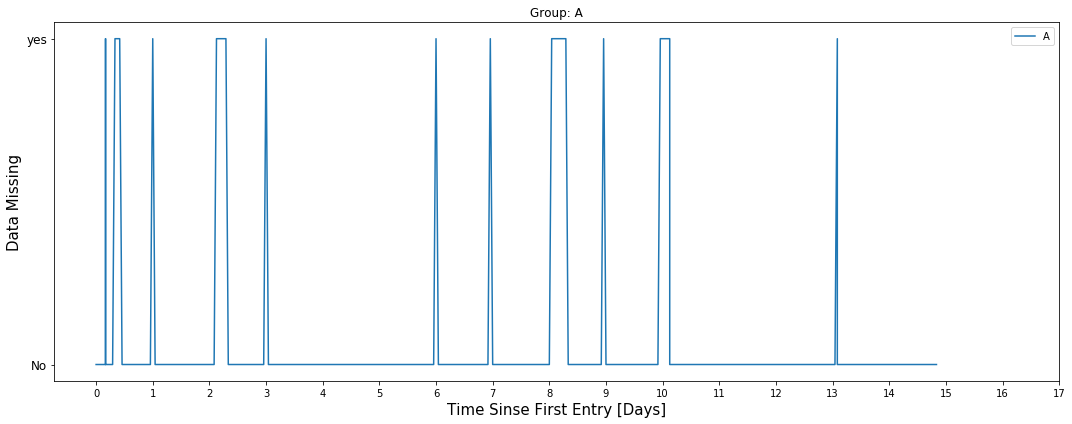

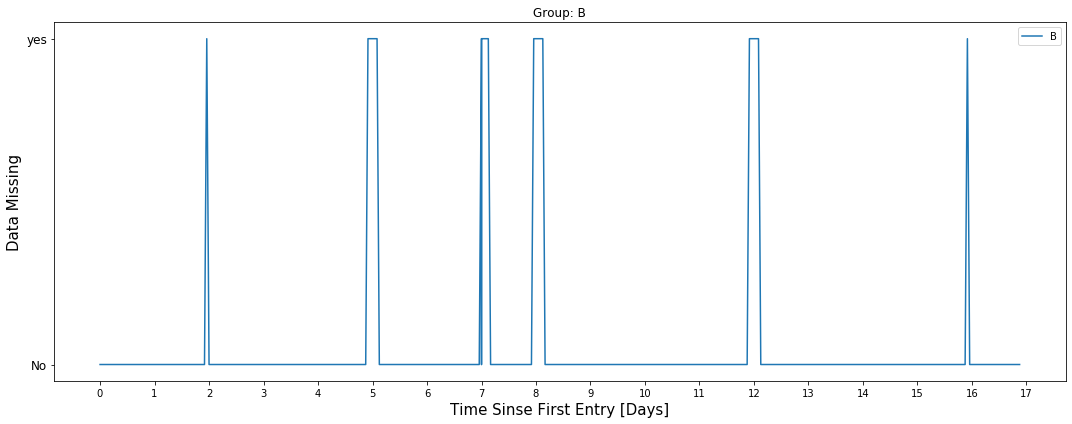

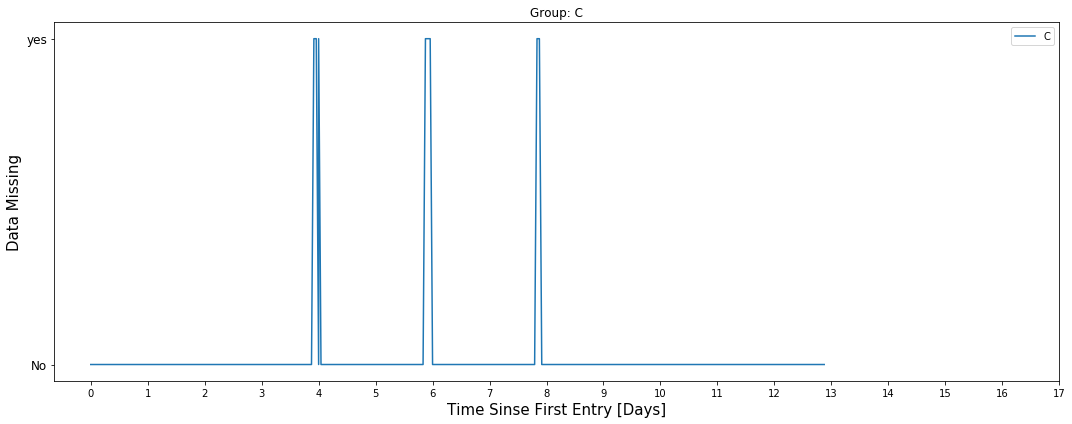

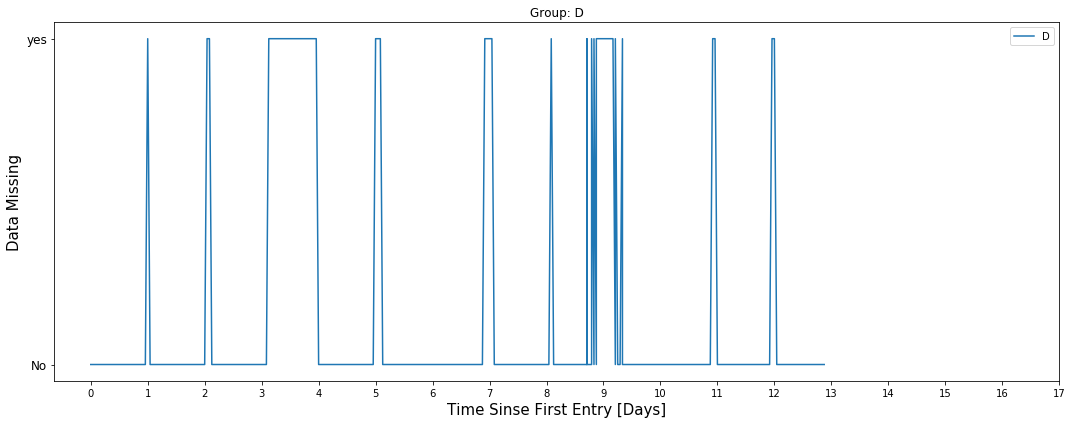

In [161]:
for label, df1 in dfp.groupby('group'):
    fig, ax = plt.subplots(figsize=(15,6))
    ax.plot(df1["time_sinse_start"], df1["is_missing"], label=label)
    ax.set_yticks([0, 1])
    ax.set_yticklabels(["No", "yes"], fontsize=12)
    ax.set_ylabel("Data Missing", fontsize=15)

    ax.set_xticks(list(range(18)))
    ax.set_xticklabels(list(range(18)))
    ax.set_xlabel("Time Sinse First Entry [Days]", fontsize=15)

    ax.legend()
    ax.set_title(f"Group: {label}")
    plt.tight_layout()

    plt.savefig(str(fig_dir / f"MissingData_Group_{label}.png"), dpi=300)

In [66]:
df

,mouse_id,group,dt,experimental_day,drink,eat,eathand,groom,hang,rear,rest,sniff,walk
0,59f2370f97ea89b50ee20eeeaf9795,A,2018-08-07 09:00:00,0,726.0,4777.0,1940.0,40180.0,3344.0,1858.0,9336.0,44842.0,837.0
1,9dce100f1df4b3b3eb2ceb1e9e08a4,A,2018-08-07 09:00:00,0,0.0,6.0,678.0,731.0,0.0,0.0,105020.0,1405.0,0.0
2,5758c7d74f42bc980671ee0577b511,A,2018-08-07 09:00:00,0,352.0,9915.0,2280.0,10741.0,1441.0,3444.0,58947.0,20123.0,597.0
3,b8c232efe73f4af290e19358082eaa,A,2018-08-07 09:00:00,0,67.0,2031.0,2950.0,15326.0,12.0,933.0,61033.0,25430.0,58.0
4,b6aad69dbd0e829bf517fa760bf090,A,2018-08-07 09:00:00,0,0.0,98.0,732.0,4485.0,0.0,33.0,97721.0,4768.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10153,7363756e3fbc51863037c3278f1dad,D,2018-06-12 07:00:00,12,2.0,7.0,1782.0,100780.0,0.0,287.0,892.0,4078.0,12.0
10154,96a6720c3f8eb32b2feb9e23c53f17,D,2018-06-12 07:00:00,12,1.0,504.0,53.0,75894.0,0.0,1198.0,10751.0,19439.0,0.0
10155,b94e89c9b8831eb2b79e26fd46b006,D,2018-06-12 07:00:00,12,1137.0,8025.0,7517.0,75445.0,0.0,9029.0,4562.0,2091.0,34.0
10156,3d2c120ca94f45aa2a4bb48d0d7124,D,2018-06-12 07:00:00,12,334.0,64.0,4.0,45988.0,5.0,497.0,27191.0,33700.0,57.0


In [71]:
df

,mouse_id,group,dt,experimental_day,time_sinse_start,drink,eat,eathand,groom,hang,rear,rest,sniff,walk
0,1a47565db6a51fa30972a6c4daa596,A,2018-08-07 09:00:00,0,0 days 00:00:00.000000000,726.0,4777.0,1940.0,40180.0,3344.0,1858.0,9336.0,44842.0,837.0
1,6e8419a758ee66fd3f2e037465a4d9,A,2018-08-07 09:00:00,0,0 days 00:00:00.000000000,0.0,6.0,678.0,731.0,0.0,0.0,105020.0,1405.0,0.0
2,00c8bb6a2e88c146bb592f11c5ff6e,A,2018-08-07 09:00:00,0,0 days 00:00:00.000000000,352.0,9915.0,2280.0,10741.0,1441.0,3444.0,58947.0,20123.0,597.0
3,ef14073df447232d768224845a28e4,A,2018-08-07 09:00:00,0,0 days 00:00:00.000000000,67.0,2031.0,2950.0,15326.0,12.0,933.0,61033.0,25430.0,58.0
4,c02ab2a7036e2d1f84854afd245f80,A,2018-08-07 09:00:00,0,0 days 00:00:00.000000000,0.0,98.0,732.0,4485.0,0.0,33.0,97721.0,4768.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10153,61991bf25637c2a86a6cc4228bba77,D,2018-06-12 07:00:00,12,12 days 21:00:00.000000000,2.0,7.0,1782.0,100780.0,0.0,287.0,892.0,4078.0,12.0
10154,bada87adec8f709635d0a5f7145b56,D,2018-06-12 07:00:00,12,12 days 21:00:00.000000000,1.0,504.0,53.0,75894.0,0.0,1198.0,10751.0,19439.0,0.0
10155,a39d9e02a4c058b143078e59fe2617,D,2018-06-12 07:00:00,12,12 days 21:00:00.000000000,1137.0,8025.0,7517.0,75445.0,0.0,9029.0,4562.0,2091.0,34.0
10156,698a2ee38ba6981b2be40941a32403,D,2018-06-12 07:00:00,12,12 days 21:00:00.000000000,334.0,64.0,4.0,45988.0,5.0,497.0,27191.0,33700.0,57.0
